### 프로그램 6-1 [LeNet-5로 MNIST 인식]

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.optimizers import Adam

# MNIST 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# LeNet-5 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(6,(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(16,(5,5),padding='same',activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(120,(5,5),padding='same',activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(84,activation='relu'))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

### 프로그램 6-2 [컨볼루션 신경망으로 MNIST 인식]

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/12
469/469 - 13s - loss: 0.2459 - accuracy: 0.9242 - val_loss: 0.0533 - val_accuracy: 0.9835 - 13s/epoch - 27ms/step
Epoch 2/12
469/469 - 4s - loss: 0.0874 - accuracy: 0.9740 - val_loss: 0.0370 - val_accuracy: 0.9875 - 4s/epoch - 8ms/step
Epoch 3/12
469/469 - 4s - loss: 0.0638 - accuracy: 0.9805 - val_loss: 0.0319 - val_accuracy: 0.9891 - 4s/epoch - 8ms/step
Epoch 4/12
469/469 - 4s - loss: 0.0562 - accuracy: 0.9828 - val_loss: 0.0320 - val_accuracy: 0.9898 - 4s/epoch - 8ms/step
Epoch 5/12
469/469 - 4s - loss: 0.0458 - accuracy: 0.9858 - val_loss: 0.0297 - val_accuracy: 0.9904 - 4s/epoch - 8ms/step
Epoch 6/12
469/469 - 4s - loss: 0.0406 - accuracy: 0.9875 - val_loss: 0.0284 - val_accuracy: 0.9912 - 4s/epoch - 8ms/step
Epoch 7/12
469/469 - 4s - loss: 0.0366 - accuracy: 0.9886 - val_loss: 0.0291 - val_accuracy: 0.9915 - 4s/epoch - 8ms/step
Epoch 8/12
469/469 - 4s - loss: 0.0317 - accuracy: 0.9903 - val_loss: 0.0270 -

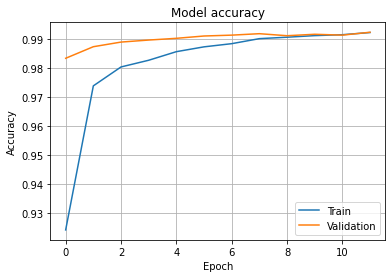

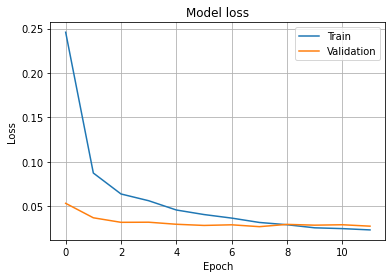

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

# MNIST 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(128,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=12,validation_data=(x_test,y_test),verbose=2)

# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

### 프로그램 6-3 [컨볼루션 신경망으로 fashon MNIST 인식]

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/12
469/469 - 4s - loss: 0.5250 - accuracy: 0.8121 - val_loss: 0.3437 - val_accuracy: 0.8757 - 4s/epoch - 10ms/step
Epoch 2/12
469/469 - 4s - loss: 0.3437 - accuracy: 0.8781 - val_loss: 0.2912 - val_accuracy: 0.8952 - 4s/epoch - 8ms/step
Epoch 3/12
469/469 - 4s - loss: 0.2933 - accuracy: 0.8938 - val_loss: 0.2624 - val_accuracy: 0.9033 - 4s/epoch - 8ms/step
Epoch 4/12
469/469 - 4s - loss: 0.2624 - accuracy: 0.9044 - val_loss: 0.2404 - val_accuracy: 0.9103 - 4s/epoch - 8ms/step
Epoch 5/12
469/469 - 4s - loss: 0.2387 - accuracy: 0.9130 - val_loss: 0.2378 - val_accuracy: 0.9136 - 4s/epoch - 8ms/step
Epoch 6/12
469/469 - 4s - loss: 0.2189 - accuracy: 0.9202 - val_loss: 0.2233 - val_accuracy: 0.9200 - 4s/epoch - 8ms/step
Epoch 7/12
469/469 - 4s - loss: 0.2008 - accuracy: 0.9259 - val_loss: 0.2166 - val_accuracy: 0.9226 - 4s/epoch - 8ms/step
Epoch 8/12
469/469 - 4s - loss: 0.1861 - accuracy: 0.9308 - val_loss: 0.2185 - val

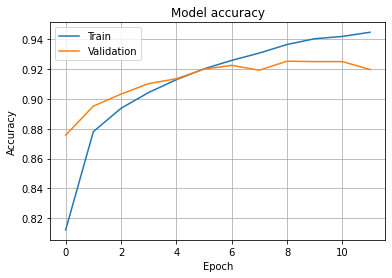

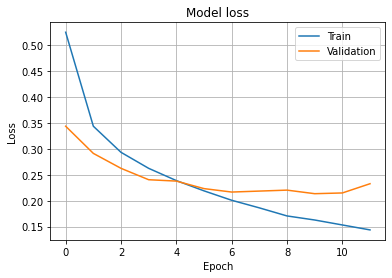

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

# MNIST 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(128,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=12,validation_data=(x_test,y_test),verbose=2)

# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

### 프로그램 6-4 [CNN으로 CIFAR-10 인식]

170498071/170498071 [==============================] - 6s 0us/step
Epoch 1/30
391/391 - 5s - loss: 1.7461 - accuracy: 0.3506 - val_loss: 1.4002 - val_accuracy: 0.4866 - 5s/epoch - 13ms/step
Epoch 2/30
391/391 - 4s - loss: 1.3812 - accuracy: 0.4991 - val_loss: 1.2128 - val_accuracy: 0.5682 - 4s/epoch - 9ms/step
Epoch 3/30
391/391 - 4s - loss: 1.2303 - accuracy: 0.5626 - val_loss: 1.0863 - val_accuracy: 0.6152 - 4s/epoch - 10ms/step
Epoch 4/30
391/391 - 4s - loss: 1.1273 - accuracy: 0.6019 - val_loss: 0.9969 - val_accuracy: 0.6516 - 4s/epoch - 10ms/step
Epoch 5/30
391/391 - 4s - loss: 1.0422 - accuracy: 0.6329 - val_loss: 0.9090 - val_accuracy: 0.6833 - 4s/epoch - 10ms/step
Epoch 6/30
391/391 - 4s - loss: 0.9791 - accuracy: 0.6554 - val_loss: 0.8627 - val_accuracy: 0.6942 - 4s/epoch - 9ms/step
Epoch 7/30
391/391 - 4s - loss: 0.9346 - accuracy: 0.6722 - val_loss: 0.8162 - val_accuracy: 0.7141 - 4s/epoch - 9ms/step
Epoch 8/30
391/391 - 4s - loss: 0.8986 - accuracy: 0.6849 - val_loss: 0.802

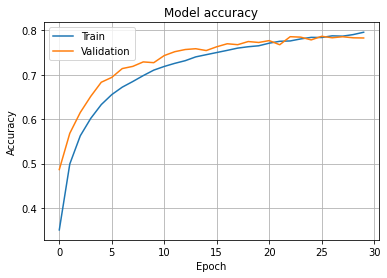

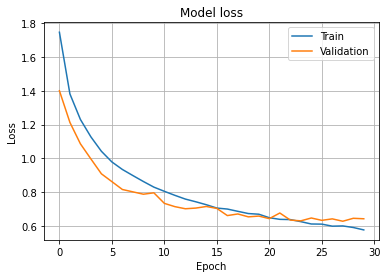

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(128,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

In [ ]:
cnn.save("my_cnn.h5")

### 프로그램 6-5 [예비 학습된 모델 불러다 쓰기]

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# 신경망 구조와 가중치를 저장하고 있는 파일을 읽어 옴
cnn=tf.keras.models.load_model("my_cnn.h5")
cnn.summary()

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 64)        36928     
                                                      

### 프로그램 6-6 [커널과 특징 맵의 시각화: CITAR-10을 인식하는 컨볼루션 신경망]

Epoch 1/30
391/391 - 5s - loss: 1.7570 - accuracy: 0.3483 - val_loss: 1.3987 - val_accuracy: 0.4920 - 5s/epoch - 12ms/step
Epoch 2/30
391/391 - 4s - loss: 1.4012 - accuracy: 0.4937 - val_loss: 1.2577 - val_accuracy: 0.5491 - 4s/epoch - 10ms/step
Epoch 3/30
391/391 - 4s - loss: 1.2416 - accuracy: 0.5594 - val_loss: 1.0703 - val_accuracy: 0.6170 - 4s/epoch - 10ms/step
Epoch 4/30
391/391 - 4s - loss: 1.1365 - accuracy: 0.6008 - val_loss: 0.9763 - val_accuracy: 0.6540 - 4s/epoch - 10ms/step
Epoch 5/30
391/391 - 4s - loss: 1.0480 - accuracy: 0.6297 - val_loss: 0.9248 - val_accuracy: 0.6689 - 4s/epoch - 10ms/step
Epoch 6/30
391/391 - 4s - loss: 0.9848 - accuracy: 0.6574 - val_loss: 0.8642 - val_accuracy: 0.6956 - 4s/epoch - 9ms/step
Epoch 7/30
391/391 - 4s - loss: 0.9340 - accuracy: 0.6742 - val_loss: 0.8158 - val_accuracy: 0.7081 - 4s/epoch - 10ms/step
Epoch 8/30
391/391 - 4s - loss: 0.8950 - accuracy: 0.6881 - val_loss: 0.7887 - val_accuracy: 0.7214 - 4s/epoch - 9ms/step
Epoch 9/30
391/391

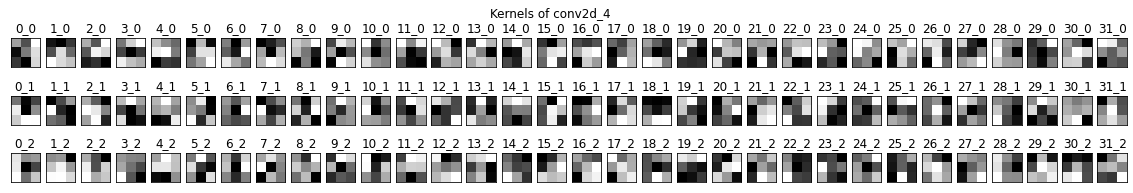

conv2d_8 (None, 30, 30, 32)
conv2d_9 (None, 28, 28, 32)
conv2d_10 (None, 12, 12, 64)
conv2d_11 (None, 10, 10, 64)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8_input (InputLayer)  [(None, 32, 32, 3)]      0         
                                                                 
 conv2d_8 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 0s 1ms/step


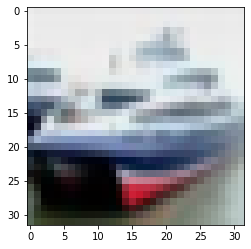

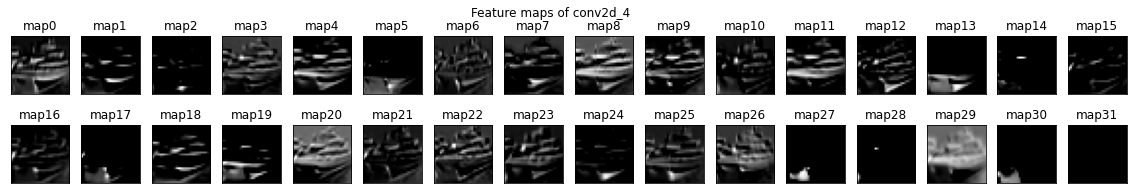

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(128,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

cnn.summary() # cnn 모델의 정보 출력

for layer in cnn.layers:
  if 'conv' in layer.name:
    kernel,biases=layer.get_weights()
    print(layer.name,kernel.max()) # 커널의 텐서 모양을 출력

kernel,biases=cnn.layers[0].get_weights() # 총 0의 커널 정보를 저장
minv,maxv=kernel.min(),kernel.max()
kernel=(kernel-minv)/(maxv-minv)
n_kernel=32

import matplotlib.pyplot as plt

plt.figure(figsize=(20,3))
plt.suptitle("Kernels of conv2d_4")
for i in range(n_kernel): # i번째 커널
  f=kernel[:,:,:,i]
  for j in range(3): # j번째 채널
    plt.subplot(3,n_kernel,j*n_kernel+i+1)
    plt.imshow(f[:,:,j],cmap='gray')
    plt.xticks([]); plt.yticks([])
    plt.title(str(i)+'_'+str(j))
plt.show()

for layer in cnn.layers:
  if 'conv' in layer.name:
    print(layer.name,layer.output.shape) # 특징 맵의 텐서 모양을 출력

from tensorflow.keras.models import Model

partial_model=Model(inputs=cnn.inputs,outputs=cnn.layers[0].output) # 총 0만 떼어냄
partial_model.summary()

feature_map=partial_model.predict(x_test) #부분 모델로 테스트 집합을 예측
fm=feature_map[1] # 1번 영상의 특징 맵을 시각화

plt.imshow(x_test[1])

plt.figure(figsize=(20,3))
plt.suptitle("Feature maps of conv2d_4")
for i in range(32):
  plt.subplot(2,16,i+1)
  plt.imshow(fm[:,:,i],cmap='gray')
  plt.xticks([]); plt.yticks([])
  plt.title("map"+str(i))
plt.show()

### 프로그램 6-7 [ImageDataGenerator로 영상 데이터셋 증대]

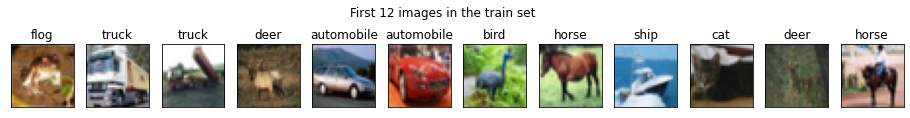

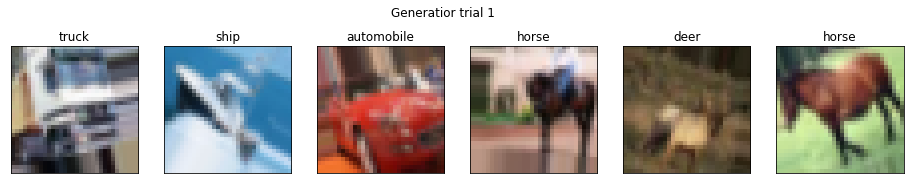

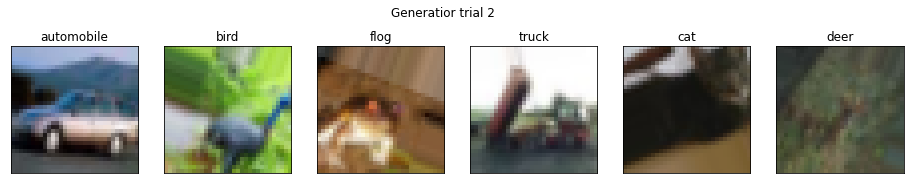

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# CIFAR-10의 부류 이름
class_names=['airplane','automobile','bird','cat','deer','dog','flog','horse','ship','truck']

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train, y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype('float32'); x_train/=255
x_train=x_train[0:12,]; y_train=y_train[0:12,]

# 앞 12개 영상을 그려줌
plt.figure(figsize=(16,2))
plt.suptitle("First 12 images in the train set")
for i in range(12):
  plt.subplot(1,12,i+1)
  plt.imshow(x_train[i])
  plt.xticks([]); plt.yticks([])
  plt.title(class_names[int(y_train[i])])

# 영상 증대기 생성
batch_siz=6
generator=ImageDataGenerator(rotation_range=30.0,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True)
gen=generator.flow(x_train,y_train,batch_size=batch_siz)

# 첫 번째 증대하고 그리기
img,label=gen.next()
plt.figure(figsize=(16,3))
plt.suptitle("Generatior trial 1")
for i in range(batch_siz):
  plt.subplot(1,batch_siz,i+1)
  plt.imshow(img[i])
  plt.xticks([]),plt.yticks([])
  plt.title(class_names[int(label[i])])

# 두 번째 증대하고 그리기
img, label =gen.next()
plt.figure(figsize=(16,3))
plt.suptitle("Generatior trial 2")

for i in range(batch_siz):
  plt.subplot(1,batch_siz,i+1)
  plt.imshow(img[i])
  plt.xticks([]),plt.yticks([])
  plt.title(class_names[int(label[i])])

### 프로그램 6-8 [CNN으로 CIFAR-10 인식: 데이터 증대 적용]

Epoch 1/50


<ipython-input-12-aac46d49eda4>:35: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist=cnn.fit_generator(generator.flow(x_train,y_train,batch_size=batch_siz),epochs=50,validation_data=(x_test,y_test),verbose=2)


391/391 - 26s - loss: 1.7731 - accuracy: 0.3438 - val_loss: 1.4156 - val_accuracy: 0.4801 - 26s/epoch - 66ms/step
Epoch 2/50
391/391 - 24s - loss: 1.4014 - accuracy: 0.4904 - val_loss: 1.1778 - val_accuracy: 0.5784 - 24s/epoch - 62ms/step
Epoch 3/50
391/391 - 23s - loss: 1.2519 - accuracy: 0.5536 - val_loss: 1.0502 - val_accuracy: 0.6240 - 23s/epoch - 60ms/step
Epoch 4/50
391/391 - 24s - loss: 1.1537 - accuracy: 0.5894 - val_loss: 0.9984 - val_accuracy: 0.6492 - 24s/epoch - 61ms/step
Epoch 5/50
391/391 - 24s - loss: 1.1012 - accuracy: 0.6103 - val_loss: 1.0169 - val_accuracy: 0.6409 - 24s/epoch - 61ms/step
Epoch 6/50
391/391 - 23s - loss: 1.0473 - accuracy: 0.6301 - val_loss: 0.8796 - val_accuracy: 0.6879 - 23s/epoch - 60ms/step
Epoch 7/50
391/391 - 25s - loss: 1.0009 - accuracy: 0.6468 - val_loss: 0.8955 - val_accuracy: 0.6868 - 25s/epoch - 63ms/step
Epoch 8/50
391/391 - 24s - loss: 0.9685 - accuracy: 0.6579 - val_loss: 0.8873 - val_accuracy: 0.6920 - 24s/epoch - 61ms/step
Epoch 9/50


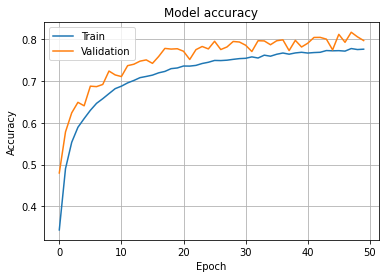

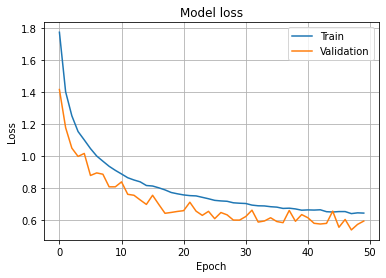

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
batch_siz=128
generator=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
hist=cnn.fit_generator(generator.flow(x_train,y_train,batch_size=batch_siz),epochs=50,validation_data=(x_test,y_test),verbose=2)

# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

### 프로그램 6-9 [교차 검증으로 드롭아웃의 성능 향상 효과 측정]

드롭아웃 적용 안 할 때: 0.7314800024032593
드롭아웃 적용할 때: 0.7532999992370606


{'whiskers': [<matplotlib.lines.Line2D at 0x7f06e0154160>,
 'caps': [<matplotlib.lines.Line2D at 0x7f06e0154820>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f06e00ade80>,
 'medians': [<matplotlib.lines.Line2D at 0x7f06e0154ee0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f06e014e220>,
 'means': []}

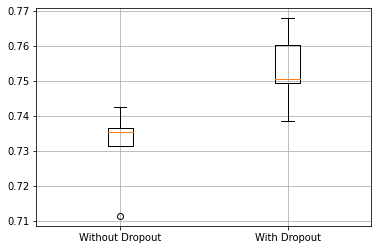

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 하이퍼 매개변수 설정
batch_siz = 128
n_epoch=10
k=5 # k-겹 교차 검증

# 드롭아웃 비율에 따라 교차 검증을 수행하고 정확률을 반환하는 함수
def cross_validation(dropout_rate):
  accuracy=[]
  for train_index,val_index in KFold(k).split(x_train):
    # 훈련 집합과 검증 집합으로 분할
    xtrain,xval = x_train[train_index],x_train[val_index]
    ytrain,yval = y_train[train_index],y_train[val_index]

    # 신경망 모델 설계
    cnn=Sequential()
    cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
    cnn.add(Conv2D(32,(3,3),activation='relu'))
    cnn.add(MaxPooling2D(pool_size=(2,2)))
    cnn.add(Dropout(dropout_rate[0]))
    cnn.add(Conv2D(64,(3,3),activation='relu'))
    cnn.add(Conv2D(64,(3,3),activation='relu'))
    cnn.add(MaxPooling2D(pool_size=(2,2)))
    cnn.add(Dropout(dropout_rate[1]))
    cnn.add(Flatten())
    cnn.add(Dense(512,activation='relu'))
    cnn.add(Dropout(dropout_rate[2]))
    cnn.add(Dense(10,activation='softmax'))

    # 신경망 모델 학습
    cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
    cnn.fit(xtrain,ytrain,batch_size=batch_siz,epochs=n_epoch,verbose=0)
    accuracy.append(cnn.evaluate(xval,yval,verbose=0)[1])

  return accuracy

# 드롭아웃 비율을 달리하며 신경망을 평가
acc_without_dropout=cross_validation([0.0,0.0,0.0])
acc_with_dropout=cross_validation([0.25,0.25,0.25])

print("드롭아웃 적용 안 할 때:",np.array(acc_without_dropout).mean())
print("드롭아웃 적용할 때:",np.array(acc_with_dropout).mean())

import matplotlib.pyplot as plt

# 박스 플롯으로 정확률 표시
plt.grid()
plt.boxplot([acc_without_dropout,acc_with_dropout],labels=["Without Dropout","With Dropout"])

### 프로그램 6-10 [교차 검증으로 제거 조사]

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold
from tensorflow.keras import regularizers

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 하이퍼 매개변수 설정
batch_siz = 128
n_epoch=10
k=5 # k-겹 교차 검증

# 드롭아웃 비율에 따라 교차 검증을 수행하고 정확률을 반환하는 함수
def cross_validation(data_gen,dropout_rate,l2_reg):
  accuracy=[]
  for train_index,val_index in KFold(k).split(x_train):
    # 훈련 집합과 검증 집합으로 분할
    xtrain,xval = x_train[train_index],x_train[val_index]
    ytrain,yval = y_train[train_index],y_train[val_index]

    # 신경망 모델 설계
    cnn=Sequential()
    cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
    cnn.add(Conv2D(32,(3,3),activation='relu'))
    cnn.add(MaxPooling2D(pool_size=(2,2)))
    cnn.add(Dropout(dropout_rate[0]))
    cnn.add(Conv2D(64,(3,3),activation='relu'))
    cnn.add(Conv2D(64,(3,3),activation='relu'))
    cnn.add(MaxPooling2D(pool_size=(2,2)))
    cnn.add(Dropout(dropout_rate[1]))
    cnn.add(Flatten())
    cnn.add(Dense(512,activation='relu'))
    cnn.add(Dropout(dropout_rate[2]))
    cnn.add(Dense(10,activation='softmax',kernel_regularizer=regularizers.l2(l2_reg)))

    # 신경망 모델 학습
    cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
    if data_gen:
      generator=ImageDataGenerator(rotation_range=3.0, width_shift_range=0.1, height_shift_range=0.1,horizontal_flip=True)
      cnn.fit_generator(generator.flow(x_train,y_train,batch_size=batch_siz),epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)
    else:
      cnn.fit(xtrain,ytrain,batch_size=batch_siz,epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)
    accuracy.append(cnn.evaluate(xval,yval,verbose=0)[1])
  return accuracy

# 하이퍼 매개변수를 달리 하며 신경망 모델을 평가
acc_000=cross_validation(False,[0.0,0.0,0.0],0.0)
acc_001=cross_validation(False,[0.0,0.0,0.0],0.01)
acc_010=cross_validation(False,[0.25,0.25,0.5],0.0)
acc_011=cross_validation(False,[0.25,0.25,0.5],0.01)
acc_100=cross_validation(True,[0.0,0.0,0.0],0.0)
acc_101=cross_validation(True,[0.0,0.0,0.0],0.01)
acc_110=cross_validation(True,[0.25,0.25,0.5],0.0)
acc_111=cross_validation(True,[0.25,0.25,0.5],0.01)

print("출력 형식: [Data augmentation-Dropout-l2 regularizer] (교차검증 시도/평균)")
print("[000] (",acc_000,"/",np.array(acc_000).mean(),")")
print("[000] (",acc_001,"/",np.array(acc_001).mean(),")")
print("[000] (",acc_010,"/",np.array(acc_010).mean(),")")
print("[000] (",acc_011,"/",np.array(acc_011).mean(),")")
print("[000] (",acc_100,"/",np.array(acc_100).mean(),")")
print("[000] (",acc_101,"/",np.array(acc_101).mean(),")")
print("[000] (",acc_110,"/",np.array(acc_110).mean(),")")
print("[000] (",acc_111,"/",np.array(acc_111).mean(),")")

import matplotlib.pyplot as plt

# 박스 플롯으로 정확률 표시
plt.grid()
plt.boxplot([acc_000,acc_001,acc_010,acc_011,acc_100,acc_101,acc_110,acc_111],labels=["000","001","010","011","100","101","110","111"])

Epoch 1/10
313/313 - 4s - loss: 1.5863 - accuracy: 0.4263 - val_loss: 1.3068 - val_accuracy: 0.5296 - 4s/epoch - 13ms/step
Epoch 2/10
313/313 - 3s - loss: 1.1937 - accuracy: 0.5761 - val_loss: 1.0765 - val_accuracy: 0.6185 - 3s/epoch - 9ms/step
Epoch 3/10
313/313 - 3s - loss: 0.9898 - accuracy: 0.6511 - val_loss: 1.0345 - val_accuracy: 0.6376 - 3s/epoch - 10ms/step
Epoch 4/10
313/313 - 3s - loss: 0.8617 - accuracy: 0.6981 - val_loss: 0.8678 - val_accuracy: 0.6984 - 3s/epoch - 9ms/step
Epoch 5/10
313/313 - 3s - loss: 0.7354 - accuracy: 0.7419 - val_loss: 0.8246 - val_accuracy: 0.7151 - 3s/epoch - 9ms/step
Epoch 6/10
313/313 - 3s - loss: 0.6344 - accuracy: 0.7782 - val_loss: 0.8081 - val_accuracy: 0.7217 - 3s/epoch - 9ms/step
Epoch 7/10
313/313 - 3s - loss: 0.5408 - accuracy: 0.8098 - val_loss: 0.9062 - val_accuracy: 0.7023 - 3s/epoch - 9ms/step
Epoch 8/10
313/313 - 3s - loss: 0.4546 - accuracy: 0.8418 - val_loss: 0.8377 - val_accuracy: 0.7286 - 3s/epoch - 10ms/step
Epoch 9/10
313/313 - 

<ipython-input-2-cf21eb4dc0ce>:50: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn.fit_generator(generator.flow(x_train,y_train,batch_size=batch_siz),epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)


391/391 - 27s - loss: 1.6154 - accuracy: 0.4089 - val_loss: 1.2666 - val_accuracy: 0.5424 - 27s/epoch - 68ms/step
Epoch 2/10
391/391 - 25s - loss: 1.2356 - accuracy: 0.5570 - val_loss: 1.0690 - val_accuracy: 0.6246 - 25s/epoch - 64ms/step
Epoch 3/10
391/391 - 25s - loss: 1.0614 - accuracy: 0.6227 - val_loss: 0.9871 - val_accuracy: 0.6565 - 25s/epoch - 63ms/step
Epoch 4/10
391/391 - 25s - loss: 0.9537 - accuracy: 0.6617 - val_loss: 0.8741 - val_accuracy: 0.6957 - 25s/epoch - 64ms/step
Epoch 5/10
391/391 - 25s - loss: 0.8757 - accuracy: 0.6926 - val_loss: 0.7957 - val_accuracy: 0.7255 - 25s/epoch - 63ms/step
Epoch 6/10
391/391 - 25s - loss: 0.8219 - accuracy: 0.7106 - val_loss: 0.8114 - val_accuracy: 0.7206 - 25s/epoch - 64ms/step
Epoch 7/10
391/391 - 24s - loss: 0.7723 - accuracy: 0.7278 - val_loss: 0.7560 - val_accuracy: 0.7403 - 24s/epoch - 63ms/step
Epoch 8/10
391/391 - 25s - loss: 0.7359 - accuracy: 0.7435 - val_loss: 0.7408 - val_accuracy: 0.7449 - 25s/epoch - 63ms/step
Epoch 9/10


###ImageNet으로 학습된 ResNet50을 cub 데이터셋으로 전이 학습

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
import os

train_folder='CUB200/train'
test_folder='CUB200/test'

class_reduce=0.1
no_class=int(len(os.listdir(train_folder))*class_reduce) #부류 개수

x_train, y_train=[],[]
for i,class_name in enumerate(os.listdir(train_folder)):
  if i<no_class:
    for fname in os.listdir(train_folder+'/'+class_name):
      img=image.load_img(train_folder+'/'+class_name+'/'+fname,target_size=(224,224))
      if len(img.getbands())!=3:
        print("주의: 유효하지 않은 영상 발생",class_name,fname)
        continue
      x=image.img_to_array(img)
      x=preprocess_input(x)
      x_train.append(x)
      y_train.append(i)

x_test,y_test=[],[]
for i,class_name in enumerate(os.listdir(test_folder)):
  if i<no_class: # 13~14행이 지정한 부류만 사용
    for fname in os.listdir(test_folder+'/'+class_name):
      img=image.load_img(test_folder+'/'+class_name,+'/'+fname,target_size=(224,224))
      if len(img.getbands())!=3:
        print("주의: 유효하지 않은 영상 발생",class_name, fname)
      x=image.img_to_array(img)
      x=preprocess_input(x)
      x_test.append(x)
      y_test.append(i)

x_train=np.asarray(x_train)
y_train=np.asarray(y_train)
x_test=np.asarray(x_test)
y_test=np.asarray(y_test)
y_train=tf.keras.utils.to_categorical(y_train,no_class)
y_test=tf.keras.utils.to_categorical(y_test,no_class)

base_model=ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
cnn=Sequential()
cnn.add(base_model)
cnn.add(Flatten())
cnn.add(Dense(1024,activation='relu'))
cnn.add(Dense(no_class,activation='softmax'))

cnn.compile(loss='categorical_crossentropy',optimizer=Adam(0.00002),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=16,epochs=10, validation_data=(x_test,y_test),verbose=1)

res=cnn.evaluate(x_test,y_test,vverbose=0)
print("정확률은",res[1]*100)


### YOLOv3을 이용한 물체 검출

In [18]:
import numpy as np
import cv2
from google.colab import drive
drive.mount('/content/gdrive')

classes = []
f=open('/content/gdrive/MyDrive/AI-with-Python/Chapter 6/coco.names.txt','r')
classes=[line.strip() for line in f.readlines()]
colors=np.random.uniform(0,255,size=(len(classes),3))

img=cv2.imread('/content/gdrive/MyDrive/AI-with-Python/Chapter 6/yolo_test.jpg')
height,width,channels=img.shape
blob=cv2.dnn.blobFromImage(img,1.0/256,(448,448),(0,0,0),swapRB=True,crop=False)

yolo_model=cv2.dnn.readNet('/content/gdrive/MyDrive/AI-with-Python/Chapter 6/yolov3.weights','/content/gdrive/MyDrive/AI-with-Python/Chapter 6/yolov3.cfg')
layer_names=yolo_model.getLayerNames()
out_layers=[layer_names[i[0]-1] for i in yolo_model.getUnconnectedOutLayers()]

yolo_model.setInput(blob)
output3=yolo_model.forward(out_layers)

class_ids,confidences,boxes=[],[],[]
for output in output3:
  for vec85 in output:
    scores=vec85[5:]
    class_id=np.argmax(scores)
    confidence=scores[class_id]
    if confidence>0.5:
      centerx,centery=int(vec85[0]*width),int(vec85[1]*height)
      w,h=int(vec85[2]*width),int(vec85[3]*height)
      x,y=int(centerx-w/2),int(centery-h/2)
      boxes.append([x,y,w,h])
      confidences.append(float(confidence))
      class_ids.append(class_id)

indexes=cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)

for i in range(len(boxes)):
  if i in indexes:
    x,y,w,h=boxes[i]
    text=str(classes[class_ids[i]])+'%.3f'%confidences[i]
    cv2.rectangle(img,(x,y),(x+w,y+h),colors[class_ids[i]],2)
    cv2.putText(img,text,(x,y+30),cv2.FONT_HERSHEY_PLAIN,2,colors[class_ids[i]],2)

cv2.imshow("Object detection",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


IndexError: ignored